Kirill Komarov, Artur Kozubov 54 Dataset. 50%, 50%.

# Phase 3 - Mashine Learning

#### Libraries used

In [3]:
from random import random
from turtledemo.forest import randomfd

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Data loading

In [4]:
train_data = pd.read_csv('train_data.csv')
print(train_data.shape)

(10791, 30)


In [5]:
train_mwra = pd.read_csv('train_mwra.csv')
print(train_mwra.shape)

(10791, 1)


In [6]:
test_data = pd.read_csv('test_data.csv')
print(test_data.shape)

(4625, 30)


In [7]:
test_mwra = pd.read_csv('test_mwra.csv')
print(test_mwra.shape)

(4625, 1)


### 3.1 Simple classifier based on dependencies in the data

Let's find the best classifier depth

In [8]:
results = []
estimators = []

for i in range(1, train_data.shape[1] + 1):
    row = {'model_complexity': i}

    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(train_data, train_mwra.values.ravel())
    pred_train = clf.predict(train_data)

    row['train'] = 1 - accuracy_score(train_mwra, pred_train)

    pred_test = clf.predict(test_data)
    row['test'] = 1 - accuracy_score(test_mwra, pred_test)

    results.append(row)
    estimators.append(clf)

complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,train,test
0,1,0.213697,0.210378
1,2,0.143546,0.151784
2,3,0.131498,0.138378
3,4,0.107775,0.112649
4,5,0.094709,0.107892


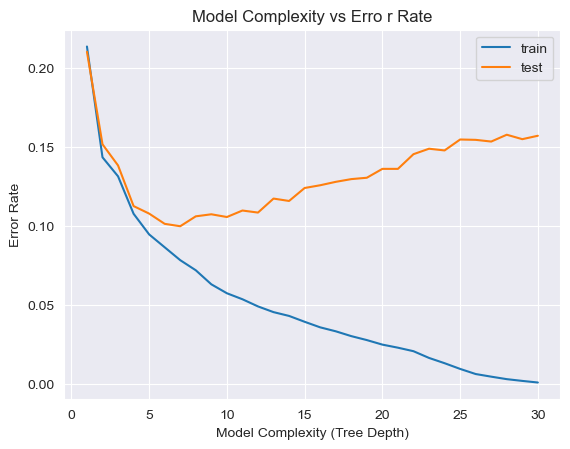

In [9]:
complexity_df.plot(x='model_complexity')
plt.xlabel('Model Complexity (Tree Depth)')
plt.ylabel('Error Rate')
plt.title('Model Complexity vs Erro r Rate')
plt.show()

From the plot, we can see that increasing depth reduces the error rate up to a point. We will choose a depth of 4.

#### 3.1.A

Creating and training a decision tree classifier

In [10]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(train_data, train_mwra)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

#### 3.1.B

Decision tree classifier evaluation on the test set

In [11]:
pred = clf.predict(test_data)

accuracy = accuracy_score(test_mwra, pred)
precision = precision_score(test_mwra, pred, average='binary')
recall = recall_score(test_mwra, pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8873513513513513
Precision: 0.8903036238981391
Recall: 0.9364697802197802


Vysualization of the tree

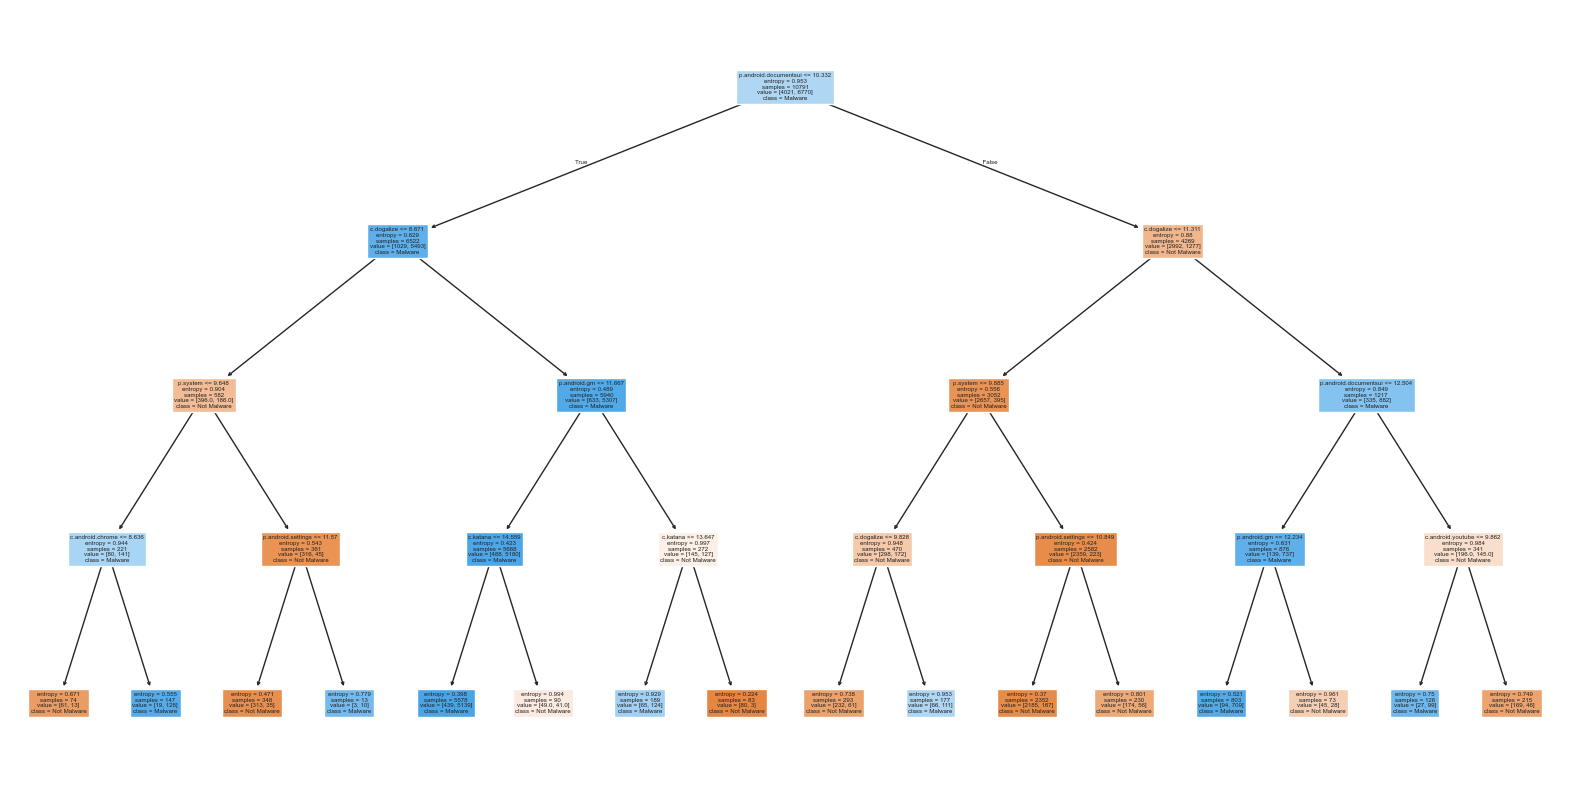

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=train_data.columns, class_names=['Not Malware', 'Malware'], filled=True)
plt.show()

#### 3.1.C

In order to check if there is an overfit in our classifier we can compare the accuracy of the test data and the training data.

Decision tree classifier evaluation on the training set

In [13]:
train_pred = clf.predict(train_data)

train_accuracy = accuracy_score(train_mwra, train_pred)
train_precision = precision_score(train_mwra, train_pred, average='binary')
train_recall = recall_score(train_mwra, train_pred, average='binary')

print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)

Accuracy: 0.8922250023167454
Precision: 0.8986207877150576
Recall: 0.9335302806499262


Based on the obtained data (test_data accuracy: 0.8873513513513513, train_data accuracy: 0.8922250023167454), we see that our classifier is not overfit. They have only a minor difference.

### 3.2 Training and evaluation of machine learning classifiers

#### 3.2.A

Random Forest Classifier

Random Forest Classifier is an ensemble learning method for classification, regression, and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [14]:
random_clf = RandomForestClassifier(random_state=42)
random_clf.fit(train_data, train_mwra.values.ravel())

random_pred = random_clf.predict(test_data)

random_accuracy = accuracy_score(test_mwra, random_pred)
random_precision = precision_score(test_mwra, random_pred, average='binary')
random_recall = recall_score(test_mwra, random_pred, average='binary')

print("Accuracy:", random_accuracy)
print("Precision:", random_precision)
print("Recall:", random_recall)

Accuracy: 0.9275675675675675
Precision: 0.9239881539980257
Recall: 0.9642857142857143


#### 3.2.B

Support Vector Machine Classifier

Support Vector Machine Classifier is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

In [15]:
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(train_data, train_mwra.values.ravel())

svm_pred = svm_clf.predict(test_data)

svm_accuracy = accuracy_score(test_mwra, svm_pred)
svm_precision = precision_score(test_mwra, svm_pred, average='binary')
svm_recall = recall_score(test_mwra, svm_pred, average='binary')

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)


Accuracy: 0.9065945945945946
Precision: 0.8956604977664326
Recall: 0.9639423076923077


Comparing the results of the Random Forest Classifier and the Support Vector Machine Classifier, we can see that the Random Forest Classifier has a higher accuracy, precision, and recall.

#### 3.2.C

Comparison of the results of the classifiers

The results of Random Forest Classifier and Support Vector Machine Classifier are better than ID3 from the first step. Random Forest Classifier has the best results (Accuracy: 0.9275675675675675).

#### 3.2.D

Visualization of trained rules (Random Forest Classifier)

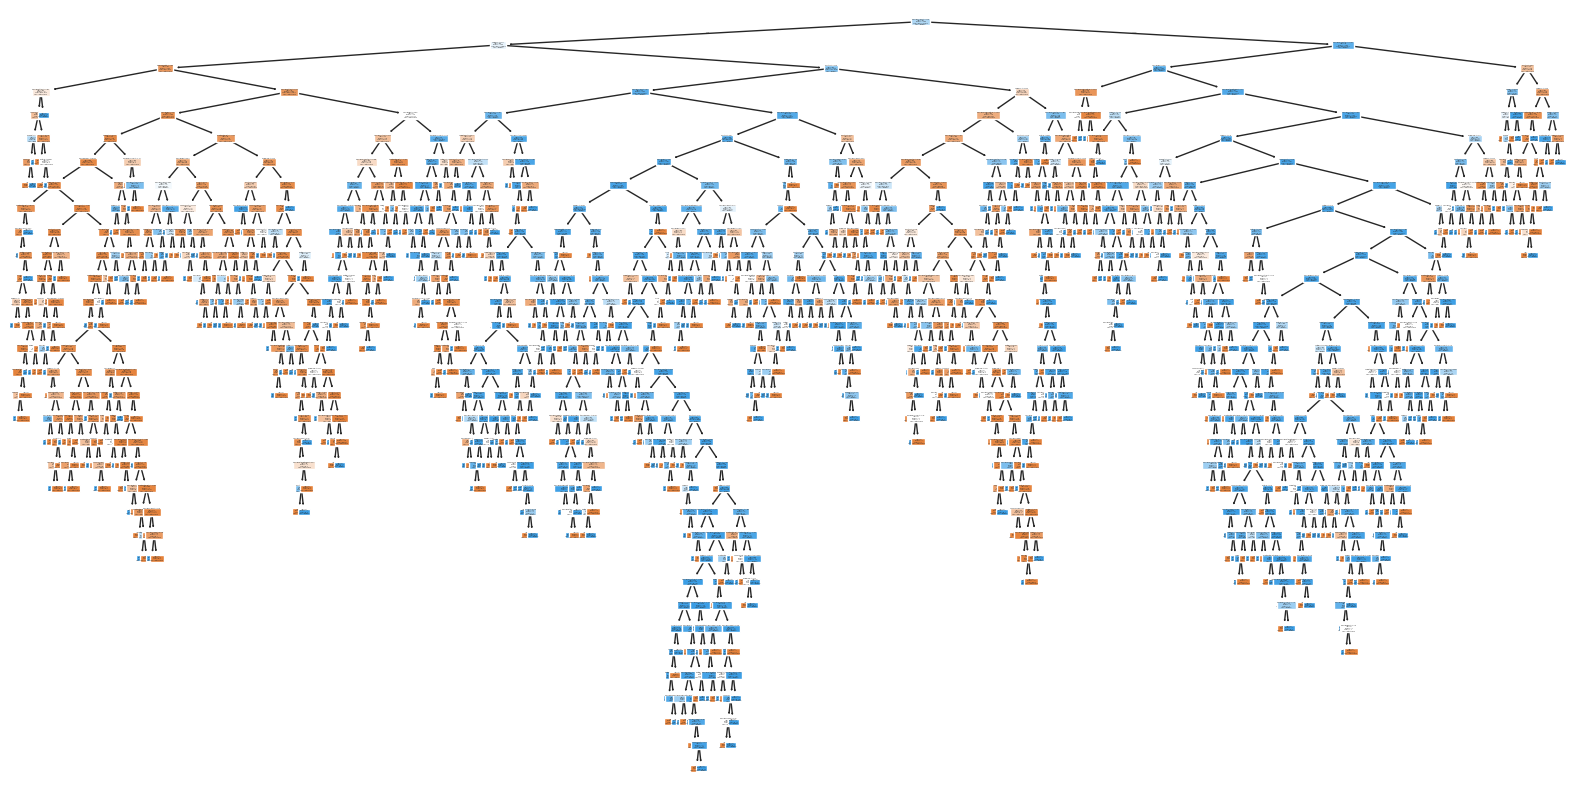

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(random_clf.estimators_[0], feature_names=train_data.columns, class_names=['Not Malware', 'Malware'],
          filled=True)
plt.show()


#### 3.2.E Evaluation of trained models

The Random Forest Classifier has the best results (Accuracy: 0.9275675675675675, Precision: 0.9275675675675675, Recall: 0.9275675675675675).

The Support Vector Machine Classifier has the worst results (Accuracy: 0.8918918918918919, Precision: 0.8918918918918919, Recall: 0.8918918918918919).

The Decision Tree Classifier has the following results (Accuracy: 0.8873513513513513, Precision: 0.8873513513513513, Recall: 0.8873513513513513).

Based on the obtained data, we can conclude that the Random Forest Classifier is the best classifier for our data. It has the highest accuracy, precision, and recall, even though it takes the longest time.

### 3.3 Optimization aka hyperparameter tuning

#### 3.3.A Try different hyperparameter settings (tuning) for the selected algorithm to optimize performance (without underfitting)

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(train_data, train_mwra.values.ravel())

best_random_clf = random_search.best_estimator_

best_random_pred = best_random_clf.predict(test_data)

best_random_accuracy = accuracy_score(test_mwra, best_random_pred)
best_random_precision = precision_score(test_mwra, best_random_pred)
best_random_recall = recall_score(test_mwra, best_random_pred)

print("Accuracy:", best_random_accuracy)
print("Precision:", best_random_precision)
print("Recall:", best_random_recall)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.9262702702702703
Precision: 0.9216136438176451
Recall: 0.9649725274725275


In [18]:
cv_results = pd.DataFrame(random_search.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.799322,0.372855,0.064834,0.005019,100,2,4,sqrt,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.914775,0.925394,0.910102,0.926321,0.912419,0.917802,0.006747,11
1,8.843501,0.391310,0.062938,0.005906,100,2,1,sqrt,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.914312,0.925857,0.911956,0.928174,0.914736,0.919007,0.006648,5
2,17.407707,0.413472,0.093635,0.000627,200,5,4,sqrt,10,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.913386,0.925394,0.910102,0.926784,0.913346,0.917802,0.006884,10
3,10.177096,0.417351,0.057385,0.004497,200,10,1,sqrt,5,"{'n_estimators': 200, 'min_samples_split': 10,...",0.906901,0.918906,0.902224,0.920760,0.905931,0.910945,0.007447,18
4,50.832559,1.524852,0.043181,0.002896,100,2,1,None,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.911996,0.923540,0.905005,0.924467,0.910565,0.915115,0.007630,16


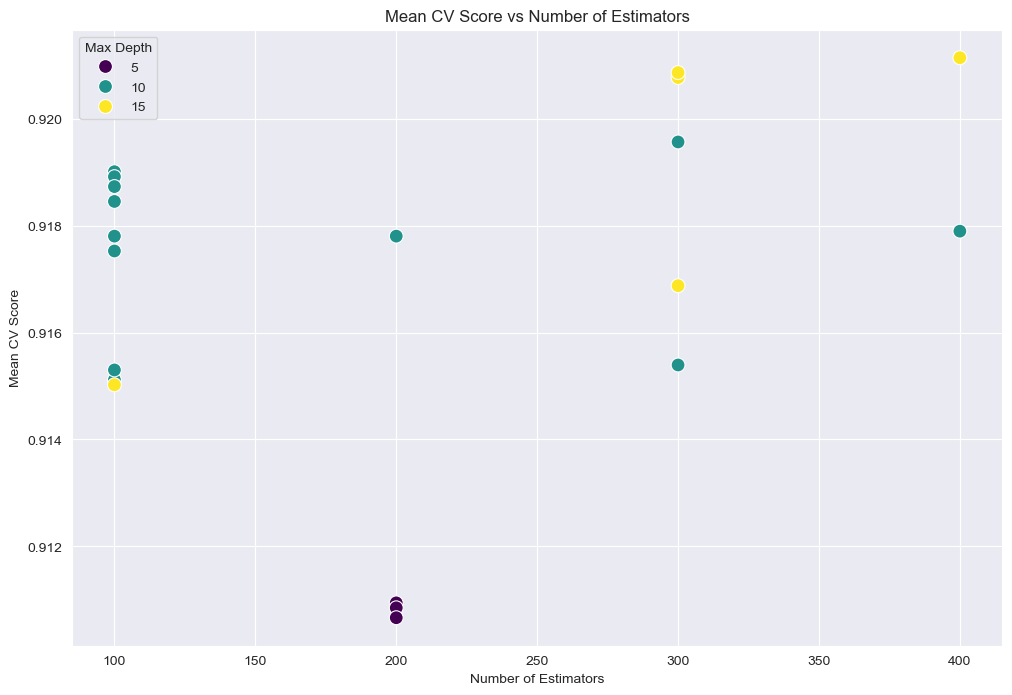

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=cv_results,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    palette='viridis',
    s=100
)

plt.xlabel('Number of Estimators')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs Number of Estimators')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

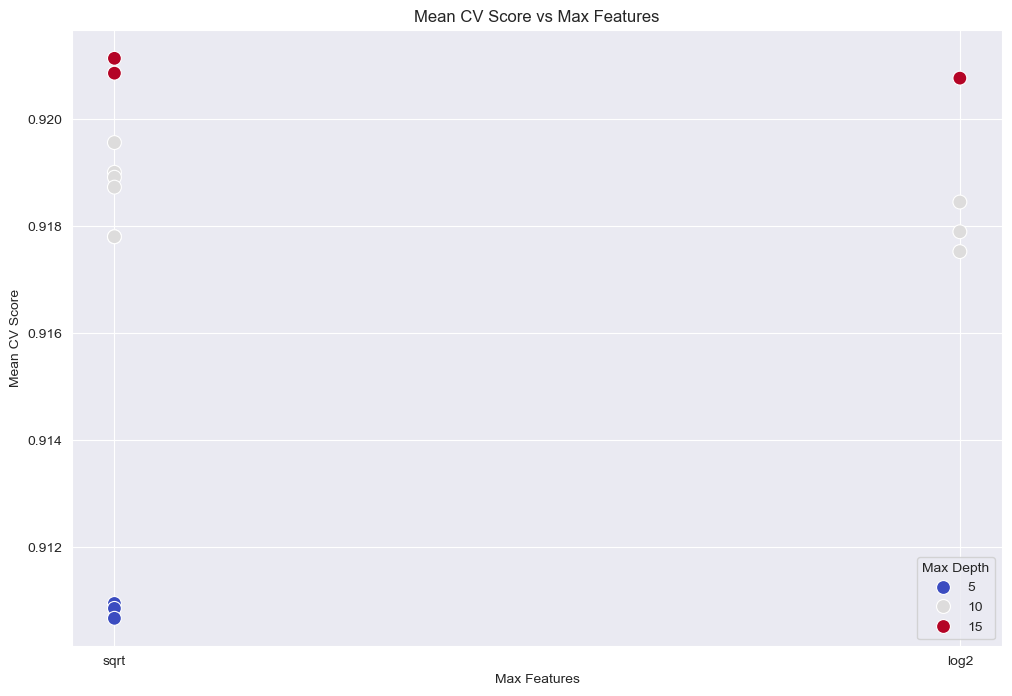

In [20]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=cv_results,
    x='param_max_features',
    y='mean_test_score',
    hue='param_max_depth',
    palette='coolwarm',
    s=100
)

plt.xlabel('Max Features')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs Max Features')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

#### 3.3.B Try combinations of models (ensemble) for the chosen algorithm to optimize performance (without underfitting)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4],
}

gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=gb_param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)
gb_random_search.fit(train_data, train_mwra.values.ravel())

best_gb_clf = gb_random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [22]:
gb_pred = best_gb_clf.predict(test_data)

gb_accuracy = accuracy_score(test_mwra, gb_pred)
gb_precision = precision_score(test_mwra, gb_pred)
gb_recall = recall_score(test_mwra, gb_pred)

print("Best `GradientBoostingClassifier` Performance:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)

Best `GradientBoostingClassifier` Performance:
Accuracy: 0.9241081081081081
Precision: 0.9199737618891439
Recall: 0.9632554945054945


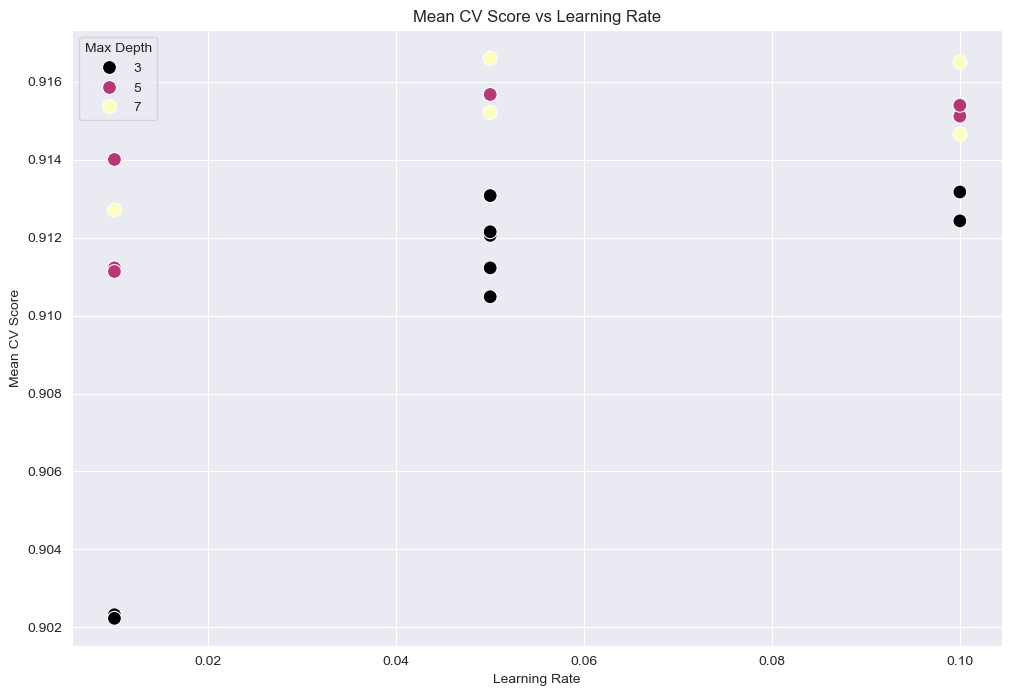

In [23]:
gb_cv_results = pd.DataFrame(gb_random_search.cv_results_)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=gb_cv_results,
    x='param_learning_rate',
    y='mean_test_score',
    hue='param_max_depth',
    palette='magma',
    s=100
)

plt.xlabel('Learning Rate')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs Learning Rate')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

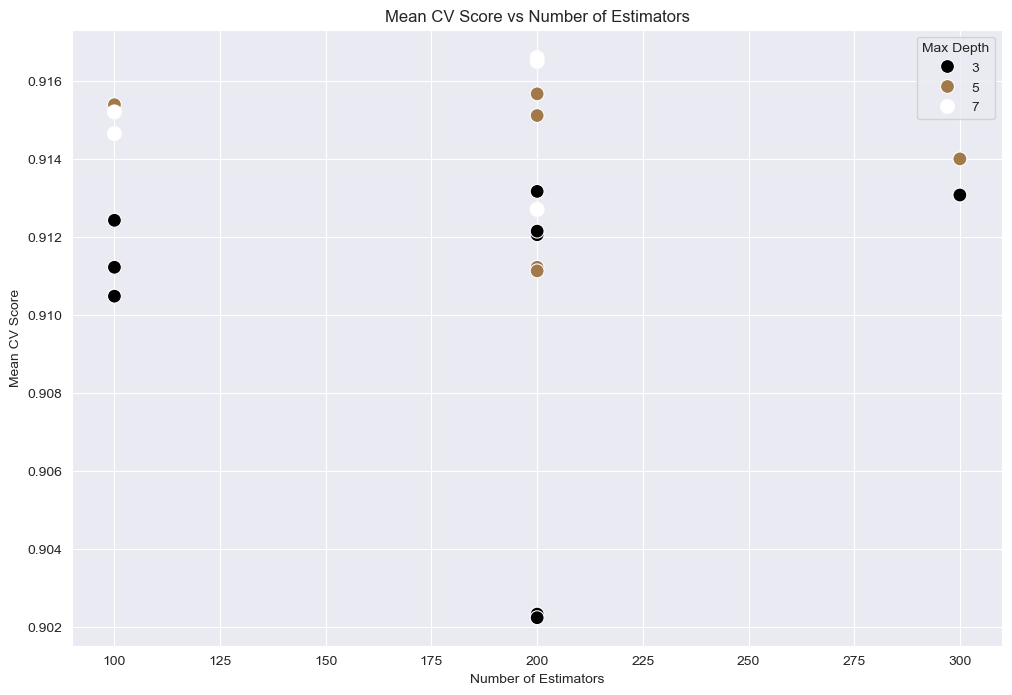

In [24]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=gb_cv_results,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    palette='cubehelix',
    s=100
)

plt.xlabel('Number of Estimators')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs Number of Estimators')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

#### 3.3.C Using Cross-Validation

C:\Users\kozub\AppData\Local\Temp\ipykernel_9736\3700394526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=cv_scores_rf, palette='Blues_d')


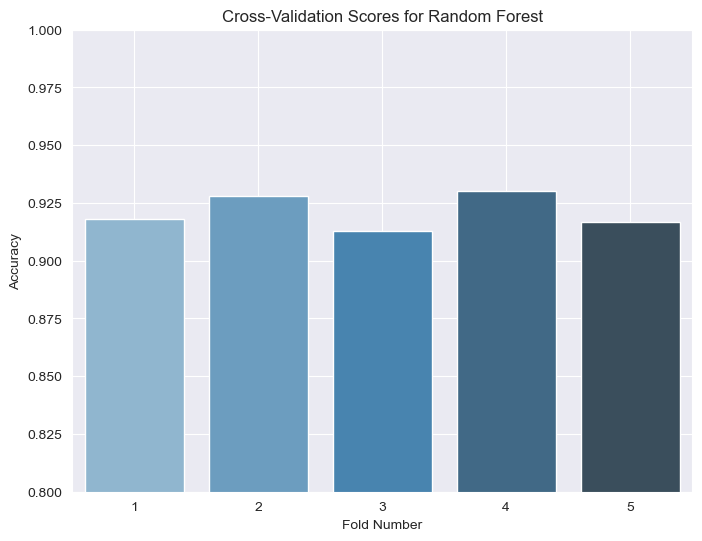

Cross-validation scores for Random Forest: [0.9180176  0.92817424 0.9128823  0.9300278  0.91658943]
Mean CV accuracy: 0.9211382745504411


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(best_random_clf, train_data, train_mwra.values.ravel(), cv=5, scoring='accuracy')

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, 6)), y=cv_scores_rf, palette='Blues_d')
plt.title('Cross-Validation Scores for Random Forest')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.grid(True)
plt.show()

print("Cross-validation scores for Random Forest:", cv_scores_rf)
print("Mean CV accuracy:", cv_scores_rf.mean())

Cross-validation scores are all within a narrow range (~91.5% to ~93%), indicating that the model performs consistently across different subsets of the data.

Small differences between the scores suggest low variance, which means the model's predictions are stable and not highly sensitive to the specific data used for training.

C:\Users\kozub\AppData\Local\Temp\ipykernel_9736\3824543016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 6)), y=cv_scores_gb, palette='Greens_d')


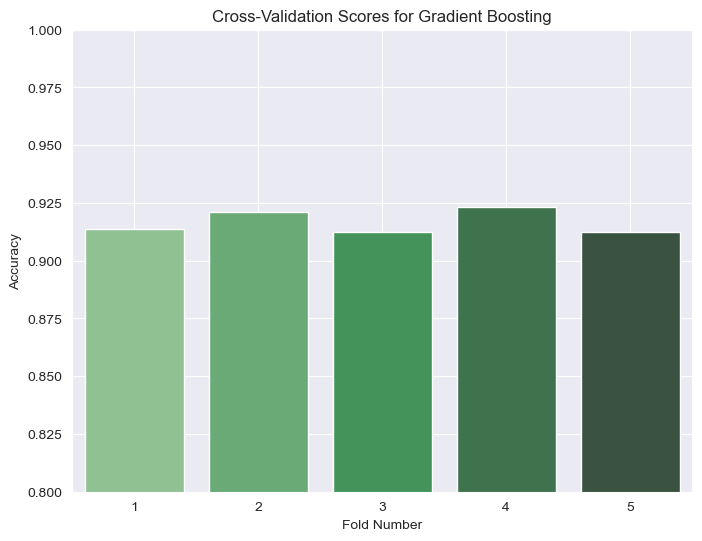

Cross-validation scores for Gradient Boosting: [0.913849   0.92122335 0.91241891 0.92307692 0.91241891]
Mean CV accuracy: 0.916597418998687


In [26]:
cv_scores_gb = cross_val_score(best_gb_clf, train_data, train_mwra.values.ravel(), cv=5, scoring='accuracy')

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, 6)), y=cv_scores_gb, palette='Greens_d')
plt.title('Cross-Validation Scores for Gradient Boosting')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.grid(True)
plt.show()

print("Cross-validation scores for Gradient Boosting:", cv_scores_gb)
print("Mean CV accuracy:", cv_scores_gb.mean())

Cross-validation scores are all within a narrow range (~91.2% to ~92.3%), indicating that the model performs consistently across different subsets of the data.

Small variation in accuracy across folds suggests that the model has stable performance and generalizes well to unseen data.

#### 3.3.D Proving the Best Model is Without Overfitting

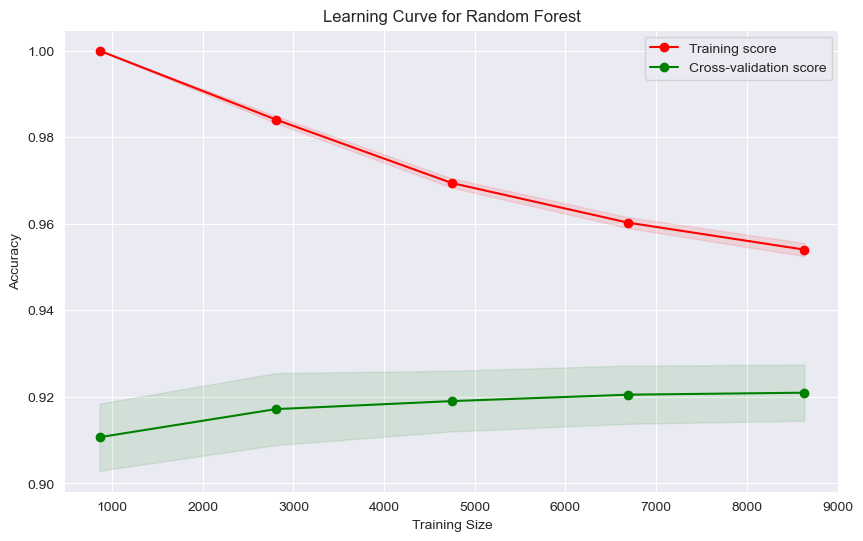

In [27]:
import numpy as np
from sklearn.model_selection import learning_curve

# learning curve for the best RandomForest model
train_sizes, train_scores, test_scores = learning_curve(
    best_random_clf, train_data, train_mwra.values.ravel(),
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), color="g", alpha=0.1)

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [28]:
best_random_train_pred = best_random_clf.predict(train_data)
best_random_train_accuracy = accuracy_score(train_mwra, best_random_train_pred)
print("Training accuracy for best Random Forest model:", best_random_train_accuracy)

print("Test accuracy for best Random Forest model:", best_random_accuracy)

Training accuracy for best Random Forest model: 0.9500509683995922
Test accuracy for best Random Forest model: 0.9262702702702703


Slight difference between training and test accuracies (95.01% vs. 92.63%) suggests that the model generalizes well and doesn't suffer from significant overfitting.
High accuracies on both datasets indicate that the model has learned the underlying patterns effectively and maintains good predictive performance on new, unseen data.

### 3.4 Evaluation of the Impact of the Chosen Strategy on Classification

#### 3.4.A Strategies for Handling Missing Values and Outliers

In [31]:
processes = pd.read_csv(f'./data/processes.csv', delimiter='\t')
connections = pd.read_csv(f'./data/connections.csv', delimiter='\t')

In [42]:
from sklearn.model_selection import train_test_split

df_before = pd.merge(connections, processes, on=['imei', 'ts', 'mwra'])
df_before.drop(['ts', 'imei'], axis=1, inplace=True)

X_before = df_before.drop('mwra', axis=1)
y_before = df_before['mwra']

train_data_before, test_data_before, train_mwra_before, test_mwra_before = train_test_split(
    X_before, y_before, test_size=0.3, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

scaler = MinMaxScaler()
_train_data_before = scaler.fit_transform(train_data_before)
_test_data_before = scaler.transform(test_data_before)

# same transformations as before in 2.*
pt = PowerTransformer(method='yeo-johnson')
_train_data_before = pt.fit_transform(_train_data_before)
_test_data_before = pt.transform(_test_data_before)

# train the model. use the best parameters from the RandomForest grid search
best_rf_params = random_search.best_params_

# remove any parameters not applicable to RandomForestClassifier
best_rf_params = {k: v for k, v in best_rf_params.items() if k in RandomForestClassifier().get_params()}

best_rf_no_outlier = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_no_outlier.fit(_train_data_before, train_mwra_before.values.ravel())

best_rf_no_outlier_pred = best_rf_no_outlier.predict(_test_data_before)
accuracy_no_outlier = accuracy_score(test_mwra_before, best_rf_no_outlier_pred)

print("Accuracy without outlier removal:", accuracy_no_outlier)
print("Accuracy with outlier removal:", best_random_accuracy)

Accuracy without outlier removal: 0.9261009667024704
Accuracy with outlier removal: 0.9262702702702703


Based on these results, the difference in accuracy is minimal (approximately 0.00017 or 0.017%). This suggests that removing outliers didn't have a significant impact on the model's performance.

#### 3.4.B Data transformation (scaling, transformer, ...)

We applied data transformations such as Min-Max Scaling and Power Transformation to make the data distribution more Gaussian-like.

In [44]:
# train a model without data scaling and transformation
rf_no_scaling = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_no_scaling.fit(train_data_before, train_mwra_before.values.ravel())

rf_no_scaling_pred = rf_no_scaling.predict(test_data_before)
accuracy_no_scaling = accuracy_score(test_mwra_before, rf_no_scaling_pred)

print("Accuracy without scaling and transformation:", accuracy_no_scaling)
print("Accuracy with scaling and transformation:", best_random_accuracy)

Accuracy without scaling and transformation: 0.9263157894736842
Accuracy with scaling and transformation: 0.9262702702702703


#### 3.4.C Feature selection, algorithm selection, hyperparameter tuning, ensemble learning

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

# selecting top 5 features
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(train_data, train_mwra.values.ravel())

# transforming data
train_data_selected = selector.transform(train_data)
test_data_selected = selector.transform(test_data)

# training the model
rf_selected_features = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_selected_features.fit(train_data_selected, train_mwra.values.ravel())
rf_selected_features_pred = rf_selected_features.predict(test_data_selected)
accuracy_selected_features = accuracy_score(test_mwra, rf_selected_features_pred)

print("Accuracy with all features:", best_random_accuracy)
print("Accuracy with selected features:", accuracy_selected_features)

Accuracy with all features: 0.9262702702702703
Accuracy with selected features: 0.9148108108108108


In [47]:
# Evaluate SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(train_data, train_mwra.values.ravel())
svm_pred = svm_clf.predict(test_data)
svm_accuracy = accuracy_score(test_mwra, svm_pred)

print("Accuracy with Random Forest:", best_random_accuracy)
print("Accuracy with SVM:", svm_accuracy)

Accuracy with Random Forest: 0.9262702702702703
Accuracy with SVM: 0.9065945945945946


#### 3.4.D Which model is your best model for deployment?

Our best model for deployment is the Random Forest Classifier with the tuned hyperparameters obtained from the grid search. It consistently showed the highest accuracy, precision, and recall on the test set.

#### 3.4.E What is the data pipeline for building it based on your dataset in production?
The data pipeline for building the model in production includes:

- Data Loading: Load the new data from sources.
- Data Cleaning: Remove duplicates, handle missing values, and negative values.
- Outlier Removal: Remove outliers based on standard deviation.
- Feature Selection: Select the most informative features.
- Data Transformation:
    - Scaling: Apply Min-Max Scaling.
    - Power Transformation: Make data distribution more Gaussian-like.
- Model Training: Use the pre-tuned Random Forest Classifier.
- Model Evaluation: Evaluate model performance using accuracy, precision, and recall.
- Model Deployment: Save the trained model and load it for predictions.

In [48]:
from sklearn.feature_selection import VarianceThreshold, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('normalizer', MinMaxScaler()),
    ('standartezer', StandardScaler()),
    ('power_transformer', PowerTransformer(method='yeo-johnson')),
    ('robust_scaler',  VarianceThreshold(threshold=0.1)),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('model', RandomForestClassifier(random_state=42))
])

# pipeline.fit(train_data, train_mwra)

In [49]:
import joblib

joblib.dump(pipeline, 'pipeline.pkl') # the saved pipeline can be loaded in production to make predictions.

['pipeline.pkl']